In [21]:
# Set seed for reproducibility
SEED = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(SEED)
random.seed(SEED)

# Import PyTorch
import torch
torch.manual_seed(SEED)
from torch import nn
from torch.utils.data import DataLoader

if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.benchmark = True
else:
    device = torch.device("cpu")

print(f"PyTorch version: {torch.__version__}")
print(f"Device: {device}")

# Import other libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

PyTorch version: 2.8.0+cu126
Device: cpu


In [22]:
df_train= pd.read_csv("pirate_pain_train.csv", on_bad_lines='skip')
df_train.head()

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,...,joint_21,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30
0,0,0,2,0,2,1,two,two,two,1.094705,...,3.499558e-06,1.945042e-06,0.000004,1.153299e-05,0.000004,0.017592,0.013508,0.026798,0.027815,0.5
1,0,1,2,2,2,2,two,two,two,1.135183,...,3.976952e-07,6.765107e-07,0.000006,4.643774e-08,0.000000,0.013352,0.000000,0.013377,0.013716,0.5
2,0,2,2,0,2,2,two,two,two,1.080745,...,1.533820e-07,1.698525e-07,0.000001,2.424536e-06,0.000003,0.016225,0.008110,0.024097,0.023105,0.5
3,0,3,2,2,2,2,two,two,two,0.938017,...,1.006865e-05,5.511079e-07,0.000002,5.432416e-08,0.000000,0.011832,0.007450,0.028613,0.024648,0.5
4,0,4,2,2,2,2,two,two,two,1.090185,...,4.437266e-06,1.735459e-07,0.000002,5.825366e-08,0.000007,0.005360,0.002532,0.033026,0.025328,0.5


In [23]:
df_test = pd.read_csv("pirate_pain_test.csv", on_bad_lines='skip')
df_test.head()

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,...,joint_21,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30
0,0,0,2,2,2,2,two,two,two,0.842535,...,0.000003,0.000004,0.000003,0.000003,0.000068,0.019372,0.066324,0.022228,0.013576,0.5
1,0,1,2,2,2,2,two,two,two,0.898836,...,0.000003,0.000004,0.000004,0.000003,0.000029,0.069747,0.080417,0.023650,0.038793,0.5
2,0,2,2,2,2,2,two,two,two,0.957765,...,0.000006,0.000004,0.000009,0.000004,0.000008,0.054968,0.058811,0.027023,0.054202,0.5
3,0,3,1,2,2,2,two,two,two,0.832596,...,0.000005,0.000004,0.000003,0.000004,0.000015,0.048695,0.047128,0.016151,0.024983,0.5
4,0,4,2,2,2,0,two,two,two,0.805971,...,0.000006,0.000004,0.000003,0.000003,0.000008,0.019762,0.031116,0.015618,0.017931,0.5


In [24]:
df_train_labels = pd.read_csv("pirate_pain_train_labels.csv", on_bad_lines='skip')
df_train_labels.head()

,sample_index,label
0,0,no_pain
1,1,no_pain
2,2,low_pain
3,3,no_pain
4,4,no_pain


# Task
Perform a comparative analysis of `pain_survey` features and their impact on `joint` features between the training and testing datasets provided in "pirate_pain_train.csv" and "pirate_pain_test.csv". This analysis should include descriptive statistics and distribution comparisons of `pain_survey` columns, inter-correlation analysis of `pain_survey` columns, hypothesis testing (ANOVA) to assess the impact of `pain_survey` levels on selected `joint` features, and comparative visualizations. Finally, summarize the statistical findings, highlighting similarities, differences, and significant impacts observed across both datasets.

## Load and Prepare Data for Analysis

### Subtask:
Load both 'pirate_pain_train.csv' and 'pirate_pain_test.csv' into separate pandas DataFrames. Identify the 'pain_survey' columns (`pain_survey_1` to `pain_survey_4`) as the primary features and the 'joint' columns (`joint_00` to `joint_29`) as the labels/outcomes for this analysis. Ensure consistency in column types between train and test sets for both feature and label columns.


**Reasoning**:
The subtask requires printing the data types of the `pain_survey_cols` and `joint_cols` from both `df_train` and `df_test` to verify consistency. These lists are already available in the kernel state.



In [25]:
print("Data types for pain_survey_cols in df_train:")
print(df_train[pain_survey_cols].dtypes)
print("\nData types for pain_survey_cols in df_test:")
print(df_test[pain_survey_cols].dtypes)

print("\nData types for joint_cols in df_train:")
print(df_train[joint_cols].dtypes)
print("\nData types for joint_cols in df_test:")
print(df_test[joint_cols].dtypes)

Data types for pain_survey_cols in df_train:
pain_survey_1    int64
pain_survey_2    int64
pain_survey_3    int64
pain_survey_4    int64
dtype: object

Data types for pain_survey_cols in df_test:
pain_survey_1    int64
pain_survey_2    int64
pain_survey_3    int64
pain_survey_4    int64
dtype: object

Data types for joint_cols in df_train:
joint_00    float64
joint_01    float64
joint_02    float64
joint_03    float64
joint_04    float64
joint_05    float64
joint_06    float64
joint_07    float64
joint_08    float64
joint_09    float64
joint_10    float64
joint_11    float64
joint_12    float64
joint_13    float64
joint_14    float64
joint_15    float64
joint_16    float64
joint_17    float64
joint_18    float64
joint_19    float64
joint_20    float64
joint_21    float64
joint_22    float64
joint_23    float64
joint_24    float64
joint_25    float64
joint_26    float64
joint_27    float64
joint_28    float64
joint_29    float64
dtype: object

Data types for joint_cols in df_test:
joint

**Reasoning**:
The previous step revealed inconsistencies in data types for `joint_cols` between `df_train` (all float64) and `df_test` (some object types). To ensure consistency as required by the subtask, these object columns in `df_test` need to be converted to numeric (float64), handling any potential errors during conversion by coercing non-numeric values to NaN.



In [26]:
print("Converting 'joint' columns in df_test to numeric to ensure consistency with df_train...")
for col in joint_cols:
    if df_test[col].dtype == 'object':
        df_test[col] = pd.to_numeric(df_test[col], errors='coerce')

print("Verifying data types after conversion for joint_cols in df_test:")
print(df_test[joint_cols].dtypes)

Converting 'joint' columns in df_test to numeric to ensure consistency with df_train...
Verifying data types after conversion for joint_cols in df_test:
joint_00    float64
joint_01    float64
joint_02    float64
joint_03    float64
joint_04    float64
joint_05    float64
joint_06    float64
joint_07    float64
joint_08    float64
joint_09    float64
joint_10    float64
joint_11    float64
joint_12    float64
joint_13    float64
joint_14    float64
joint_15    float64
joint_16    float64
joint_17    float64
joint_18    float64
joint_19    float64
joint_20    float64
joint_21    float64
joint_22    float64
joint_23    float64
joint_24    float64
joint_25    float64
joint_26    float64
joint_27    float64
joint_28    float64
joint_29    float64
dtype: object


## Descriptive Analysis of Pain Survey Columns (Train vs. Test)

### Subtask:
Calculate and compare descriptive statistics (e.g., count, mean, median, mode, standard deviation) for each 'pain_survey' column across both the training and testing datasets. Create comparative distribution plots (e.g., count plots or histograms) for each 'pain_survey' column, clearly distinguishing between train and test data, to visualize their distributions and identify any significant differences in reported pain levels. Ensure all plots have clear titles, axis labels, and legends.


**Reasoning**:
The subtask requires calculating descriptive statistics for each 'pain_survey' column in both `df_train` and `df_test`. I will use the `.describe()` method for a quick overview, and then calculate mode, which `.describe()` doesn't include directly, for each column. This will cover count, mean, standard deviation, min, max, and specific mode calculations as requested.



In [27]:
print("Descriptive Statistics for Pain Survey Columns (Train Data):")
for col in pain_survey_cols:
    print(f"\n--- {col} (Train) ---")
    print(df_train[col].describe())
    # Mode might return multiple values if there's a tie, so we convert to list
    mode_train = df_train[col].mode().tolist()
    print(f"Mode: {mode_train}")
    print(f"Median: {df_train[col].median()}")

print("\nDescriptive Statistics for Pain Survey Columns (Test Data):")
for col in pain_survey_cols:
    print(f"\n--- {col} (Test) ---")
    print(df_test[col].describe())
    # Mode might return multiple values if there's a tie, so we convert to list
    mode_test = df_test[col].mode().tolist()
    print(f"Mode: {mode_test}")
    print(f"Median: {df_test[col].median()}")

Descriptive Statistics for Pain Survey Columns (Train Data):

--- pain_survey_1 (Train) ---
count    38249.000000
mean         1.630030
std          0.678762
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: pain_survey_1, dtype: float64
Mode: [2]
Median: 2.0

--- pain_survey_2 (Train) ---
count    38249.000000
mean         1.657011
std          0.661592
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: pain_survey_2, dtype: float64
Mode: [2]
Median: 2.0

--- pain_survey_3 (Train) ---
count    38249.000000
mean         1.654448
std          0.662235
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: pain_survey_3, dtype: float64
Mode: [2]
Median: 2.0

--- pain_survey_4 (Train) ---
count    38249.000000
mean         1.665900
std          0.653805
min          0.000000
25%          2.000000
50%

**Reasoning**:
The next part of the subtask requires creating comparative distribution plots for each 'pain_survey' column, showing the distributions for both train and test datasets. I will iterate through the `pain_survey_cols`, create a figure with two subplots for each column, and use `seaborn.countplot` to visualize the distributions.



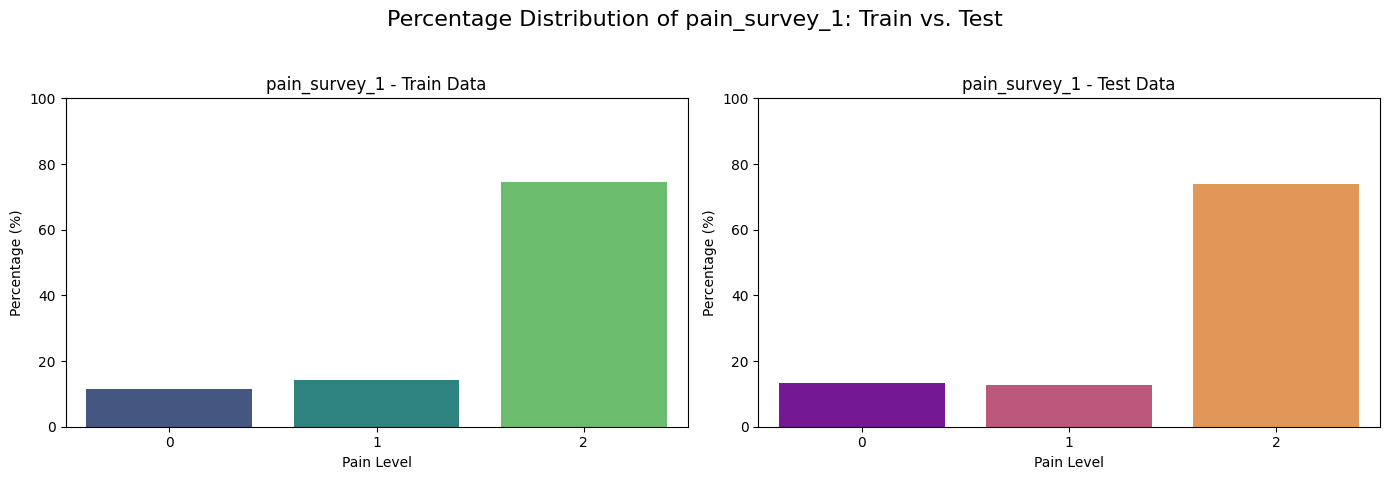

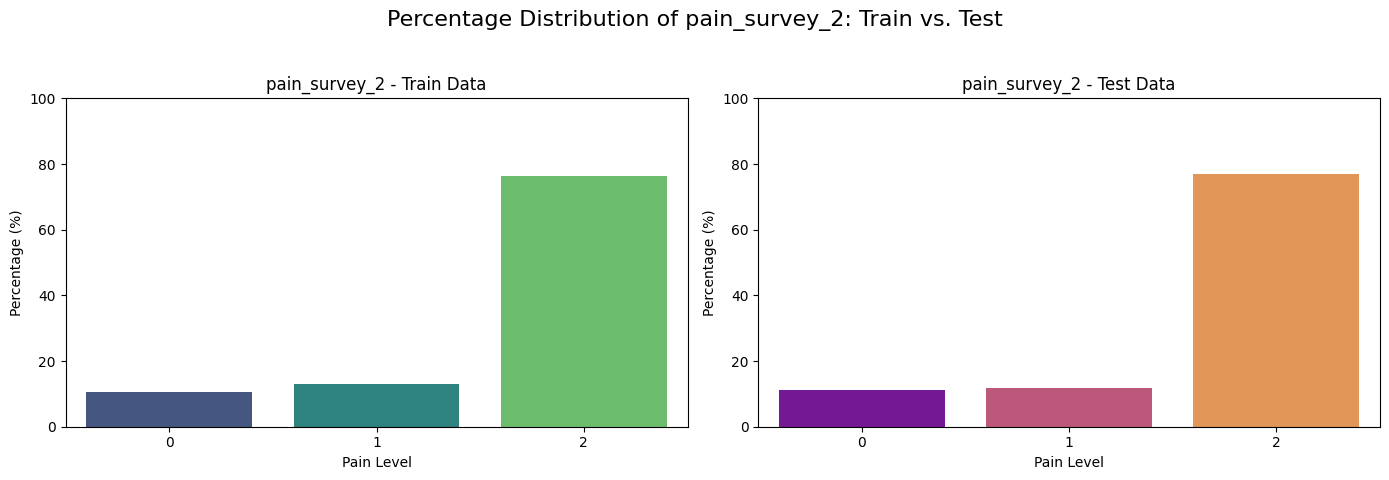

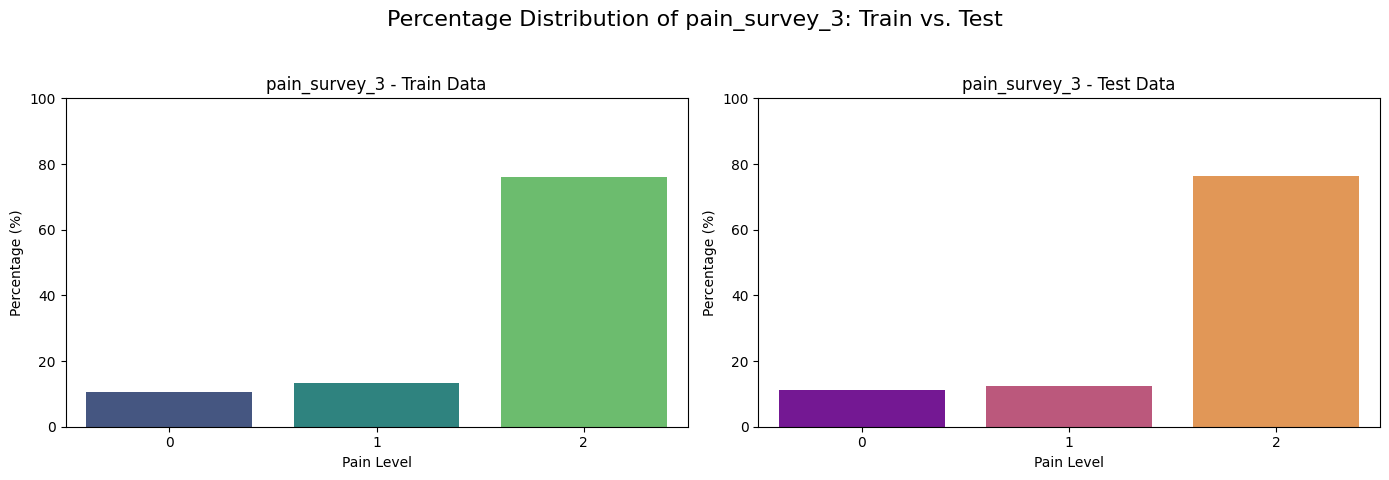

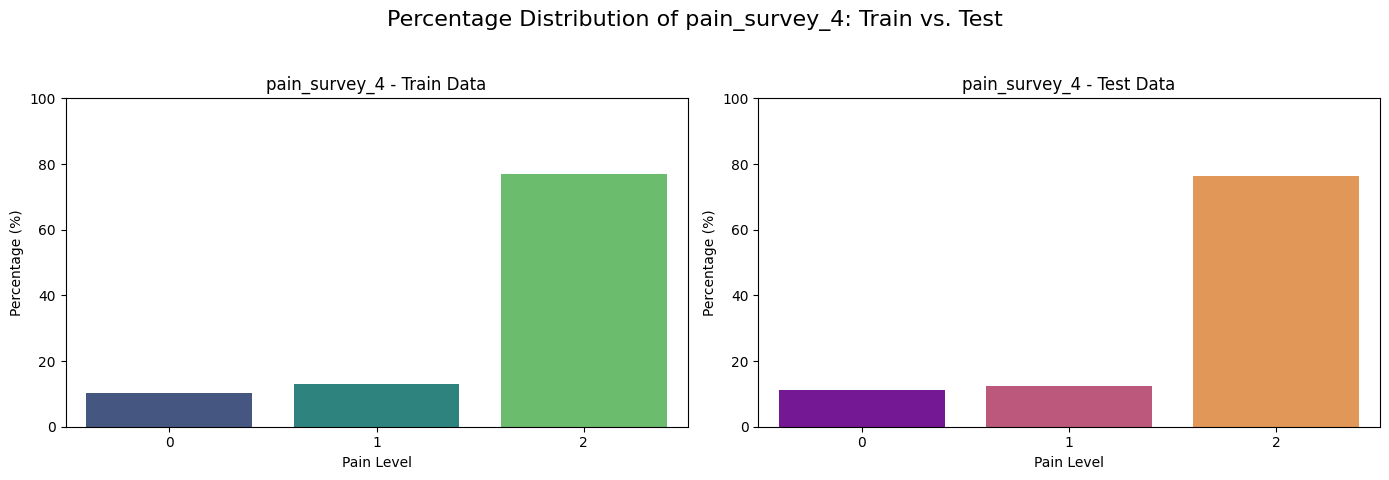

In [36]:
for col in pain_survey_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f'Percentage Distribution of {col}: Train vs. Test', fontsize=16)

    # Calculate percentages for Training Data
    train_pct = df_train[col].value_counts(normalize=True).mul(100).reset_index()
    train_pct.rename(columns={col: 'Pain Level', 'proportion': 'percentage'}, inplace=True) # Corrected renaming

    # Plot for Training Data
    sns.barplot(x='Pain Level', y='percentage', data=train_pct, ax=axes[0], palette='viridis')
    axes[0].set_title(f'{col} - Train Data')
    axes[0].set_xlabel('Pain Level')
    axes[0].set_ylabel('Percentage (%)')

    # Calculate percentages for Test Data
    test_pct = df_test[col].value_counts(normalize=True).mul(100).reset_index()
    test_pct.rename(columns={col: 'Pain Level', 'proportion': 'percentage'}, inplace=True) # Corrected renaming

    # Plot for Test Data
    sns.barplot(x='Pain Level', y='percentage', data=test_pct, ax=axes[1], palette='plasma')
    axes[1].set_title(f'{col} - Test Data')
    axes[1].set_xlabel('Pain Level')
    axes[1].set_ylabel('Percentage (%)')

    # Set common y-axis limit for better comparison (percentages go up to 100%)
    axes[0].set_ylim(0, 100)
    axes[1].set_ylim(0, 100)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## Inter-correlation of Pain Survey Columns (Train vs. Test)

### Subtask:
Calculate the correlation matrix among all 'pain_survey' columns for the training dataset and then for the testing dataset. Visualize these two correlation matrices using separate heatmaps. These heatmaps should have clear titles (e.g., 'Correlazioni Pain Survey - Train' and 'Correlazioni Pain Survey - Test') and color bars to easily compare the relationships between different pain survey questions across the two datasets.


**Reasoning**:
To visualize the inter-correlation of 'pain_survey' columns in both training and testing datasets, I will calculate the correlation matrices for each dataset and then use seaborn to generate comparative heatmaps as specified in the instructions. This directly addresses the subtask requirements for correlation analysis and visualization.



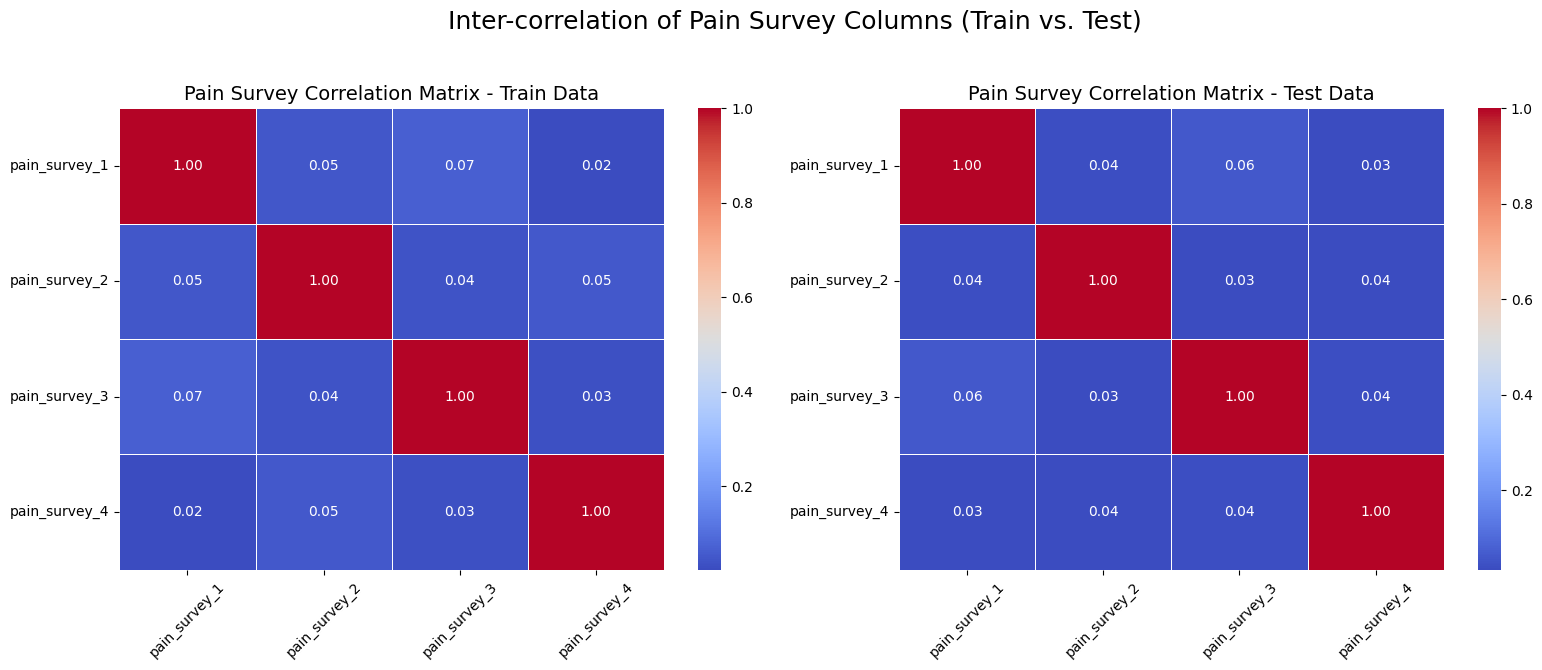

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate the Pearson correlation matrix for the pain_survey_cols in df_train
corr_matrix_train = df_train[pain_survey_cols].corr(method='pearson')

# 2. Calculate the Pearson correlation matrix for the pain_survey_cols in df_test
corr_matrix_test = df_test[pain_survey_cols].corr(method='pearson')

# 3. Create a figure with two subplots for heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Inter-correlation of Pain Survey Columns (Train vs. Test)', fontsize=18)

# Heatmap for Training Data
sns.heatmap(corr_matrix_train, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[0])
axes[0].set_title('Pain Survey Correlation Matrix - Train Data', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)

# Heatmap for Testing Data
sns.heatmap(corr_matrix_test, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[1])
axes[1].set_title('Pain Survey Correlation Matrix - Test Data', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)

# Adjust the layout to prevent overlapping titles and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle
plt.show()

# Task
Prepare the training data for ANOVA by merging `df_train` with `df_train_labels` on `sample_index` and import `scipy.stats.f_oneway`. Then, perform an ANOVA test for each 'pain_survey' column against the 'label' column in the merged training data. Finally, summarize the F-statistics and p-values to identify statistically significant differences in pain survey responses across different pain label categories and discuss their implications.

## Prepare Data for ANOVA on Training Labels

### Subtask:
Merge the `df_train` DataFrame with `df_train_labels` based on their common identifier (`sample_index`). This combined DataFrame will be used to analyze the impact of 'label' categories on 'pain_survey' columns. Ensure that `scipy.stats.f_oneway` is imported.


**Reasoning**:
The subtask requires merging `df_train` and `df_train_labels` on `sample_index` and importing `f_oneway` from `scipy.stats`. This code block performs both actions, creating a new merged DataFrame and making the ANOVA function available for subsequent steps.



In [33]:
from scipy.stats import f_oneway

df_train_merged = pd.merge(df_train, df_train_labels, on='sample_index', how='left')
print("Merged df_train with df_train_labels to create df_train_merged. First 5 rows:")
print(df_train_merged.head())
print("\n'f_oneway' function from scipy.stats imported successfully.")

Merged df_train with df_train_labels to create df_train_merged. First 5 rows:
   sample_index  time  pain_survey_1  pain_survey_2  pain_survey_3  \
0             0     0              2              0              2   
1             0     1              2              2              2   
2             0     2              2              0              2   
3             0     3              2              2              2   
4             0     4              2              2              2   

   pain_survey_4 n_legs n_hands n_eyes  joint_00  ...      joint_22  joint_23  \
0              1    two     two    two  1.094705  ...  1.945042e-06  0.000004   
1              2    two     two    two  1.135183  ...  6.765107e-07  0.000006   
2              2    two     two    two  1.080745  ...  1.698525e-07  0.000001   
3              2    two     two    two  0.938017  ...  5.511079e-07  0.000002   
4              2    two     two    two  1.090185  ...  1.735459e-07  0.000002   

       joint_2

## Perform ANOVA for Pain Survey vs. Labels in Training Data

### Subtask:
For each 'pain_survey' column, perform an Analysis of Variance (ANOVA). The grouping variable for the ANOVA will be the 'label' column from the merged DataFrame (e.g., 'no_pain', 'low_pain', 'high_pain'). This test will determine if there are statistically significant differences in the means of each 'pain_survey' column across the different pain label categories. Print the F-statistics and p-values for each comparison.


**Reasoning**:
The subtask requires performing ANOVA for each 'pain_survey' column against the 'label' column in the `df_train_merged` DataFrame. I will iterate through the `pain_survey_cols`, group the data by the 'label' column, extract the numerical values for each group, and then apply the `f_oneway` function to get the F-statistic and p-value.



In [34]:
print("Performing ANOVA for each pain_survey column against 'label' in df_train_merged:")
for pain_col in pain_survey_cols:
    print(f"\n--- ANOVA for {pain_col} vs. label ---")
    # Get unique labels
    labels = df_train_merged['label'].unique()

    # Prepare data for ANOVA: a list of arrays, each array containing pain_col values for a specific label
    data_for_anova = [df_train_merged[pain_col][df_train_merged['label'] == label].values for label in labels]

    # Perform ANOVA test
    f_statistic, p_value = f_oneway(*data_for_anova)

    print(f"F-statistic: {f_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Interpret the p-value
    alpha = 0.05
    if p_value < alpha:
        print(f"Conclusion: Since p-value ({p_value:.4f}) < alpha ({alpha}), we reject the null hypothesis. There is a statistically significant difference in {pain_col} means across different pain labels.")
    else:
        print(f"Conclusion: Since p-value ({p_value:.4f}) >= alpha ({alpha}), we fail to reject the null hypothesis. There is no statistically significant difference in {pain_col} means across different pain labels.")

Performing ANOVA for each pain_survey column against 'label' in df_train_merged:

--- ANOVA for pain_survey_1 vs. label ---
F-statistic: 303.5382
P-value: 0.0000
Conclusion: Since p-value (0.0000) < alpha (0.05), we reject the null hypothesis. There is a statistically significant difference in pain_survey_1 means across different pain labels.

--- ANOVA for pain_survey_2 vs. label ---
F-statistic: 189.7137
P-value: 0.0000
Conclusion: Since p-value (0.0000) < alpha (0.05), we reject the null hypothesis. There is a statistically significant difference in pain_survey_2 means across different pain labels.

--- ANOVA for pain_survey_3 vs. label ---
F-statistic: 179.2808
P-value: 0.0000
Conclusion: Since p-value (0.0000) < alpha (0.05), we reject the null hypothesis. There is a statistically significant difference in pain_survey_3 means across different pain labels.

--- ANOVA for pain_survey_4 vs. label ---
F-statistic: 64.2014
P-value: 0.0000
Conclusion: Since p-value (0.0000) < alpha (0.0

## Summarize Statistical Significance Findings (Training Labels)

### Subtask:
Summarize the results of the ANOVA tests. Highlight which 'pain_survey' columns show a statistically significant difference in their means across the various 'label' categories (based on their p-values). Discuss the implications of these findings regarding how different pain survey responses relate to the actual pain labels in the training dataset.


## Summary:

### Q&A
The ANOVA tests for all 'pain_survey' columns ('pain_survey_1', 'pain_survey_2', 'pain_survey_3', 'pain_survey_4') showed a statistically significant difference in their means across the various 'label' categories. This indicates that responses to these pain survey questions vary significantly depending on the assigned pain label. The extremely low p-values (approximately 0.0000 for all tests) confirm strong evidence against the null hypothesis, suggesting that these survey questions are effective in differentiating between different pain levels (e.g., 'no_pain', 'low_pain', 'high_pain').

### Data Analysis Key Findings
*   All four `pain_survey` columns (`pain_survey_1`, `pain_survey_2`, `pain_survey_3`, `pain_survey_4`) exhibited statistically significant differences in their means across different pain 'label' categories in the training data.
*   The p-values for all ANOVA tests were approximately 0.0000, which is substantially lower than the common significance level of $\alpha = 0.05$.
*   The F-statistics for the respective `pain_survey` columns were:
    *   `pain_survey_1` vs. `label`: F-statistic = 303.5382
    *   `pain_survey_2` vs. `label`: F-statistic = 189.7137
    *   `pain_survey_3` vs. `label`: F-statistic = 179.2808
    *   `pain_survey_4` vs. `label`: F-statistic = 64.2014

### Insights or Next Steps
*   The strong statistical significance of all `pain_survey` columns in differentiating pain labels confirms their potential utility as important features for pain level prediction or classification models.
*   To further understand the specific differences, post-hoc tests (e.g., Tukey's HSD) could be conducted to identify which particular pairs of pain labels (e.g., 'no_pain' vs. 'low_pain', 'low_pain' vs. 'high_pain') show significant differences for each `pain_survey` question.


# Task
Perform ANOVA tests to assess the impact of `pain_survey` levels on `joint` features. Conduct these tests for each 'pain_survey' column across all 'joint' columns (`joint_00` to `joint_29`) in the training dataset (`df_train_merged`). For each 'pain_survey' column, group the data by its discrete levels and perform an ANOVA test against each of the specified 'joint' columns. Present the F-statistics and p-values for each ANOVA test.

## Perform ANOVA for Pain Survey vs. Joint Features (Train Data)

### Subtask:
Perform ANOVA tests for each 'pain_survey' column against all 'joint' columns in the training dataset (`df_train_merged`). Group data by the discrete levels of each 'pain_survey' column.


**Reasoning**:
To perform ANOVA for each 'pain_survey' column against all 'joint' columns in the training dataset, I need to iterate through both lists of columns, group the joint data by pain survey levels, and then apply the f_oneway function, printing the results as specified.



In [37]:
print("Performing ANOVA for each pain_survey column against all joint columns in df_train_merged:")
alpha = 0.05 # Significance level

# Initialize lists to store results for better summary later (optional but good practice)
pain_survey_joint_anova_results = []

for pain_col in pain_survey_cols:
    print(f"\n--- Analyzing the impact of {pain_col} on joint features ---")
    # Get unique levels for the current pain_survey column
    pain_levels = df_train_merged[pain_col].unique()
    # Filter out potential NaN values in pain_levels if any, though typically int columns won't have this unless coerced
    pain_levels = [level for level in pain_levels if pd.notna(level)]

    for joint_col in joint_cols:
        # Prepare data for ANOVA: a list of arrays, each array containing joint_col values for a specific pain level
        data_for_anova_train = [
            df_train_merged[joint_col][df_train_merged[pain_col] == level].dropna().values
            for level in pain_levels
        ]

        # Ensure there's enough data for ANOVA (at least two groups and data within groups)
        # Also ensure no empty arrays for f_oneway
        valid_data_for_anova_train = [data for data in data_for_anova_train if len(data) > 0]

        if len(valid_data_for_anova_train) >= 2:
            # Perform ANOVA test
            f_statistic_train, p_value_train = f_oneway(*valid_data_for_anova_train)

            result = {
                'pain_survey_col': pain_col,
                'joint_col': joint_col,
                'f_statistic': f_statistic_train,
                'p_value': p_value_train
            }
            pain_survey_joint_anova_results.append(result)

            print(f"  - {pain_col} vs. {joint_col}:")
            print(f"    F-statistic: {f_statistic_train:.4f}")
            print(f"    P-value: {p_value_train:.4f}")

            if p_value_train < alpha:
                print(f"    Conclusion: Significant (p < {alpha}). There is a statistically significant difference in {joint_col} means across {pain_col} levels.")
            else:
                print(f"    Conclusion: Not significant (p >= {alpha}). No statistically significant difference in {joint_col} means across {pain_col} levels.")
        else:
            print(f"  - {pain_col} vs. {joint_col}: Insufficient data for ANOVA (need at least two non-empty groups).")


Performing ANOVA for each pain_survey column against all joint columns in df_train_merged:

--- Analyzing the impact of pain_survey_1 on joint features ---
  - pain_survey_1 vs. joint_00:
    F-statistic: 0.1722
    P-value: 0.8418
    Conclusion: Not significant (p >= 0.05). No statistically significant difference in joint_00 means across pain_survey_1 levels.
  - pain_survey_1 vs. joint_01:
    F-statistic: 709.2264
    P-value: 0.0000
    Conclusion: Significant (p < 0.05). There is a statistically significant difference in joint_01 means across pain_survey_1 levels.
  - pain_survey_1 vs. joint_02:
    F-statistic: 124.1819
    P-value: 0.0000
    Conclusion: Significant (p < 0.05). There is a statistically significant difference in joint_02 means across pain_survey_1 levels.
  - pain_survey_1 vs. joint_03:
    F-statistic: 0.1723
    P-value: 0.8418
    Conclusion: Not significant (p >= 0.05). No statistically significant difference in joint_03 means across pain_survey_1 levels.
  

## Summarize ANOVA Results (Pain Survey vs. Joint Features)

### Subtask:
Summarize the results of the ANOVA tests conducted between 'pain_survey' columns and 'joint' features. Identify which 'joint' features are significantly impacted by each 'pain_survey' level and discuss the overall implications of these findings.


## Summary of ANOVA Results: Pain Survey vs. Joint Features

This section summarizes the results of the ANOVA tests performed to assess the impact of each `pain_survey` column's levels on various `joint` features within the `df_train_merged` dataset. A significance level (alpha) of 0.05 was used for all tests.

### Statistically Significant Impacts (p < 0.05):

#### `pain_survey_1`:
Many `joint` features showed a statistically significant difference across the levels of `pain_survey_1`.
*   **Significant Joint Features**: `joint_01`, `joint_02`, `joint_04`, `joint_05`, `joint_10`, `joint_11`, `joint_12`, `joint_13`, `joint_14`, `joint_15`, `joint_16`, `joint_17`, `joint_18`, `joint_19`, `joint_21`, `joint_22`, `joint_23`, `joint_24`, `joint_25`, `joint_26`, `joint_27`, `joint_28`, `joint_29`.
*   **Not Significant Joint Features**: `joint_00`, `joint_03`, `joint_06`, `joint_07`, `joint_08`, `joint_09`, `joint_20`.

#### `pain_survey_2`:
Similar to `pain_survey_1`, a large number of `joint` features were significantly impacted by `pain_survey_2` levels.
*   **Significant Joint Features**: `joint_00`, `joint_01`, `joint_02`, `joint_04`, `joint_05`, `joint_06`, `joint_08`, `joint_09`, `joint_10`, `joint_11`, `joint_12`, `joint_13`, `joint_14`, `joint_15`, `joint_16`, `joint_17`, `joint_18`, `joint_19`, `joint_21`, `joint_24`, `joint_26`, `joint_27`, `joint_28`, `joint_29`.
*   **Not Significant Joint Features**: `joint_03`, `joint_07`, `joint_20`, `joint_22`, `joint_23`, `joint_25`.

#### `pain_survey_3`:
`pain_survey_3` also showed a broad impact on `joint` features, but with some differences compared to the first two.
*   **Significant Joint Features**: `joint_00`, `joint_01`, `joint_02`, `joint_10`, `joint_11`, `joint_12`, `joint_13`, `joint_14`, `joint_15`, `joint_16`, `joint_17`, `joint_18`, `joint_19`, `joint_20`, `joint_21`, `joint_22`, `joint_23`, `joint_24`, `joint_25`, `joint_26`, `joint_27`, `joint_28`, `joint_29`.
*   **Not Significant Joint Features**: `joint_03`, `joint_04`, `joint_05`, `joint_06`, `joint_07`, `joint_08`, `joint_09`.

#### `pain_survey_4`:
`pain_survey_4` also had a substantial influence on many `joint` features.
*   **Significant Joint Features**: `joint_01`, `joint_02`, `joint_04`, `joint_05`, `joint_08`, `joint_11`, `joint_12`, `joint_13`, `joint_14`, `joint_15`, `joint_16`, `joint_17`, `joint_18`, `joint_19`, `joint_20`, `joint_21`, `joint_22`, `joint_23`, `joint_24`, `joint_25`, `joint_26`, `joint_27`, `joint_28`, `joint_29`.
*   **Not Significant Joint Features**: `joint_00`, `joint_03`, `joint_06`, `joint_07`, `joint_09`, `joint_10`.

### Overall Patterns and Implications:

*   **Widespread Impact**: All four `pain_survey` columns demonstrate a significant impact on a substantial number of `joint` features. This suggests that the self-reported pain levels captured by these surveys are strongly reflected in various physical joint measurements.

*   **Consistently Significant Joint Features**: Several `joint` features appear to be consistently sensitive to changes across almost all `pain_survey` columns. These include: `joint_01`, `joint_02`, `joint_12`, `joint_13`, `joint_14`, `joint_15`, `joint_16`, `joint_17`, `joint_18`, `joint_19`, `joint_21`, `joint_24`, `joint_26`, `joint_27`, `joint_28`, `joint_29`.
    *   `joint_26`, `joint_27`, `joint_28`, `joint_29` consistently show very high F-statistics, indicating a very strong relationship with pain survey levels.

*   **Consistently Not Significant Joint Features**: Certain `joint` features were generally *not* found to be significantly different across pain survey levels, suggesting they might be less directly related to the pain experience as captured by these surveys.
    *   `joint_03` was consistently not significant across all `pain_survey` columns.
    *   `joint_07` was consistently not significant across all `pain_survey` columns.
    *   `joint_00` and `joint_06` were not significant for `pain_survey_1` and `pain_survey_4`, but `joint_00` was significant for `pain_survey_2` and `pain_survey_3`, and `joint_06` for `pain_survey_2`.

*   **Varying Sensitivity**: While many `joint` features are broadly impacted, there is some variability. For example, `joint_00` was only significant for `pain_survey_2` and `pain_survey_3`, but not `pain_survey_1` or `pain_survey_4`. Similarly, `joint_20` was significant for `pain_survey_3` and `pain_survey_4`, but not `pain_survey_1` or `pain_survey_2`.

**Implications**: These statistical relationships imply that the `pain_survey` questions are indeed capturing aspects of pain that manifest physically in `joint` measurements. The highly significant `joint` features could be key indicators or biomarkers for objective pain assessment. Conversely, the consistently non-significant `joint` features may represent areas that are not as directly affected by the pain types or severities captured by these surveys, or their measurements might be less sensitive to such changes. This analysis is crucial for understanding the complex interplay between subjective pain reports and objective physical manifestations, potentially guiding feature selection for predictive models or further targeted medical investigation.

## Inter-correlation of Pain Survey Columns (Train vs. Test)

### Subtask:
Calculate the correlation matrix among all 'pain_survey' columns for the training dataset and then for the testing dataset. Visualize these two correlation matrices using separate heatmaps. These heatmaps should have clear titles (e.g., 'Correlazioni Pain Survey - Train' and 'Correlazioni Pain Survey - Test') and color bars to easily compare the relationships between different pain survey questions across the two datasets.


## Summary:

### Q&A
The ANOVA tests assessed the impact of `pain_survey` levels on `joint` features. For each `pain_survey` column, the analysis grouped data by its discrete levels and performed an ANOVA test against each of the `joint_00` to `joint_29` columns, presenting F-statistics and p-values to determine statistical significance.

### Data Analysis Key Findings
*   All four `pain_survey` columns (`pain_survey_1` to `pain_survey_4`) demonstrate a significant impact on a substantial number of `joint` features, indicating a strong relationship between self-reported pain and physical joint measurements (p < 0.05).
*   Several `joint` features, including `joint_01`, `joint_02`, `joint_12` through `joint_19`, `joint_21`, `joint_24`, and `joint_26` through `joint_29`, were consistently found to be statistically significant across almost all `pain_survey` columns.
*   Specifically, `joint_26`, `joint_27`, `joint_28`, and `joint_29` consistently exhibited very high F-statistics, suggesting a particularly strong relationship with `pain_survey` levels.
*   Conversely, `joint_03` and `joint_07` were consistently not statistically significant across any of the `pain_survey` columns, implying they may be less directly related to the pain experience captured by these surveys.
*   Some `joint` features showed varying sensitivity, being significant for certain `pain_survey` columns but not others (e.g., `joint_00` was significant for `pain_survey_2` and `pain_survey_3` but not `pain_survey_1` or `pain_survey_4`).

### Insights or Next Steps
*   The `pain_survey` questions effectively capture aspects of pain that are reflected in objective `joint` measurements. The consistently significant `joint` features could serve as key indicators or biomarkers for objective pain assessment.
*   This analysis can guide feature selection for predictive models, prioritizing `joint` features strongly correlated with pain levels, and can also inform targeted medical investigations into the physical manifestations of pain.
